## Lab | Random variable distributions
Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

### Instructions
1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Disable warnings to suppress unnecessary output (optional)
warnings.filterwarnings("ignore")

%run /Users/leozinho.air/Desktop/Ironhack/Python/Classes/functions/data_cleaning_functions.ipynb





In [92]:
# 1. Get the numerical variables from our dataset.

df = pd.read_csv('/Users/leozinho.air/Desktop/Ironhack/class_22/lab-random-variable-distributions/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

standard_head(df) # standardize column name

numerical = df.select_dtypes(include= np.number)

numerical



,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


1. None of the variables seem to fit a theoretical normal distribution


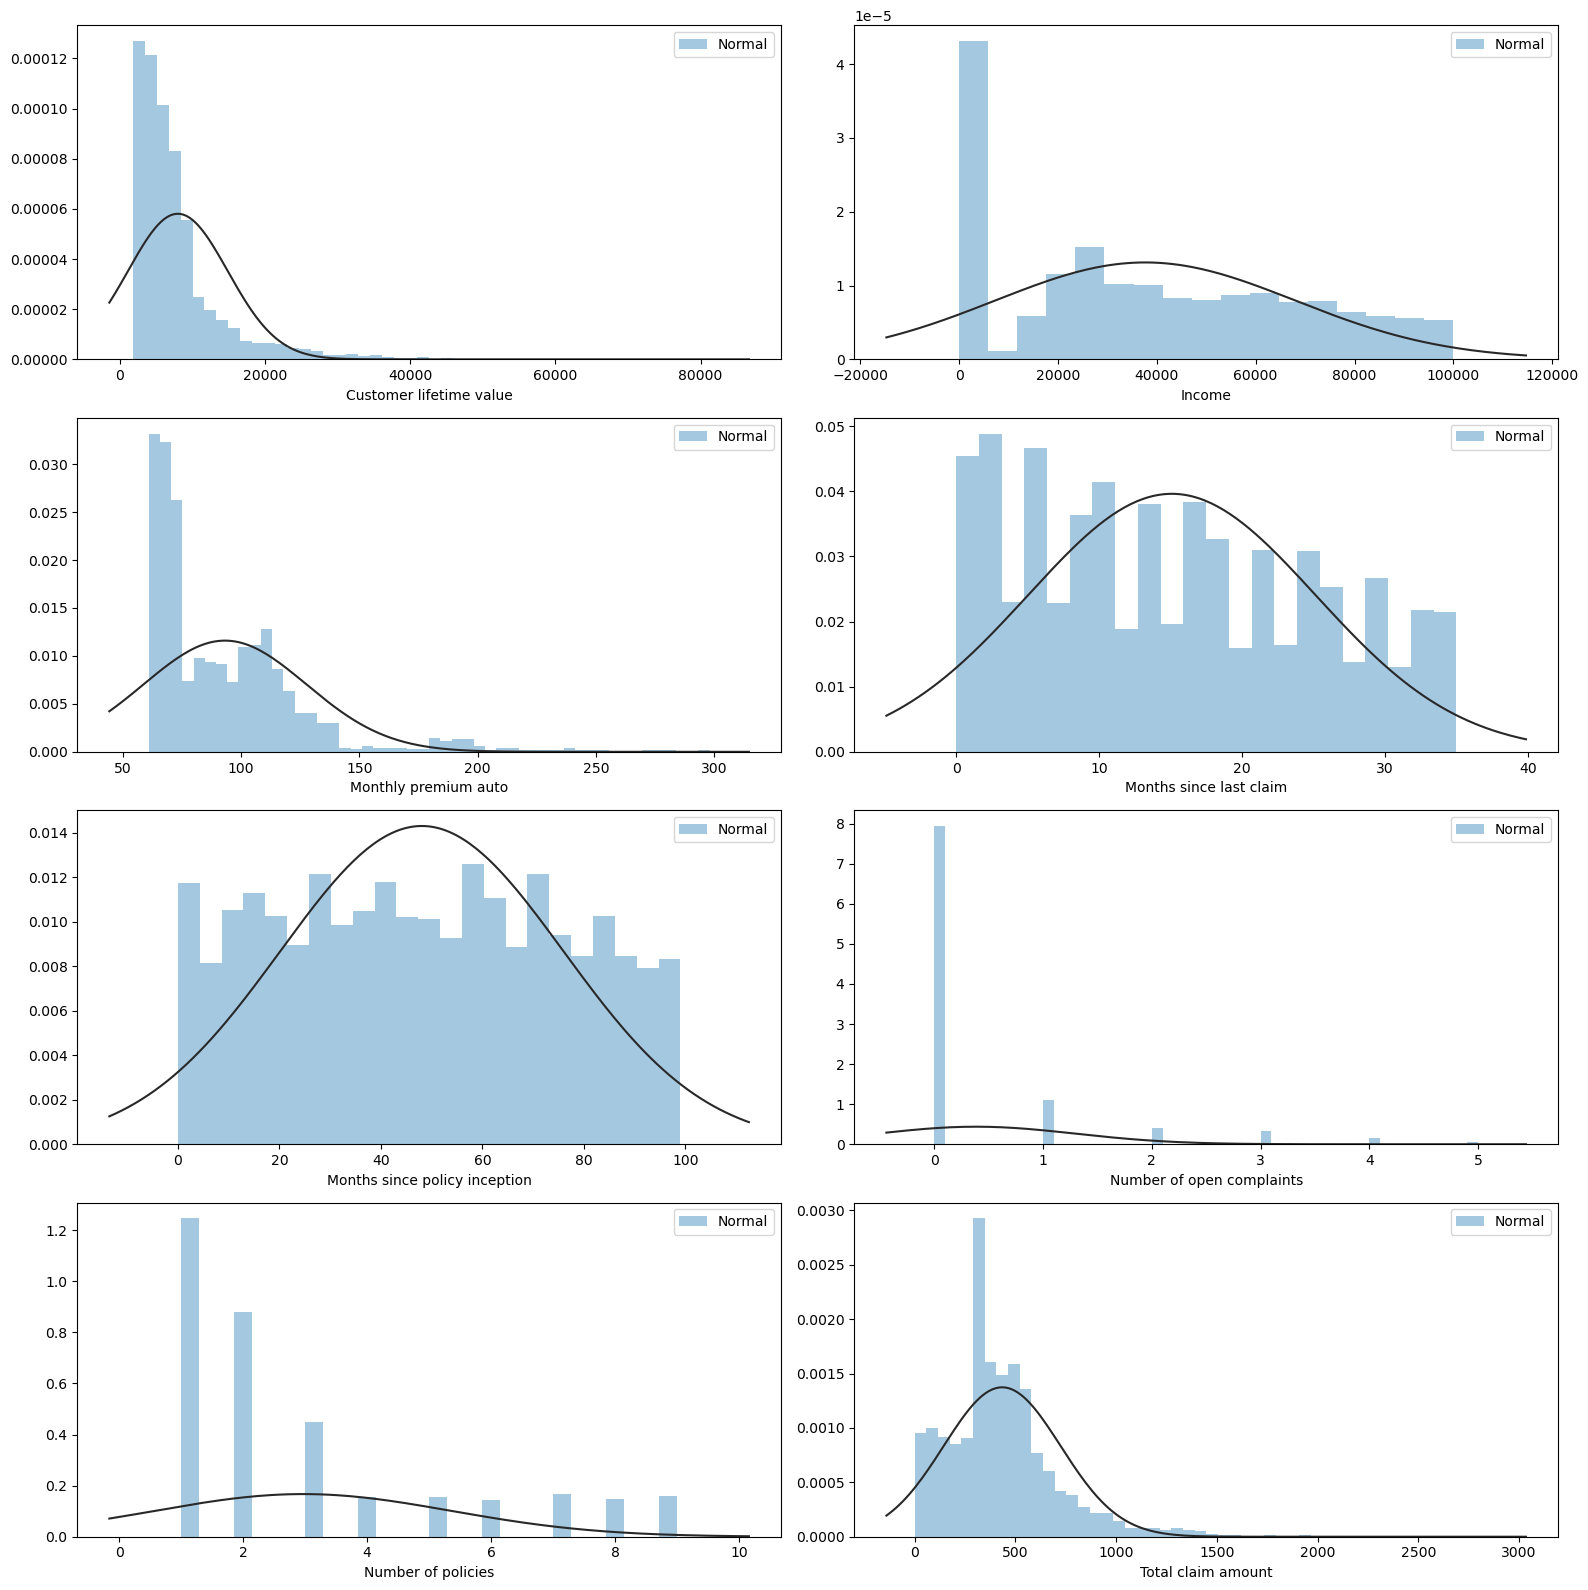

2. The variables "Customer lifetime value"-"Monthly premium auto"-"Number of open complaints" seem to follow a exponential distribution


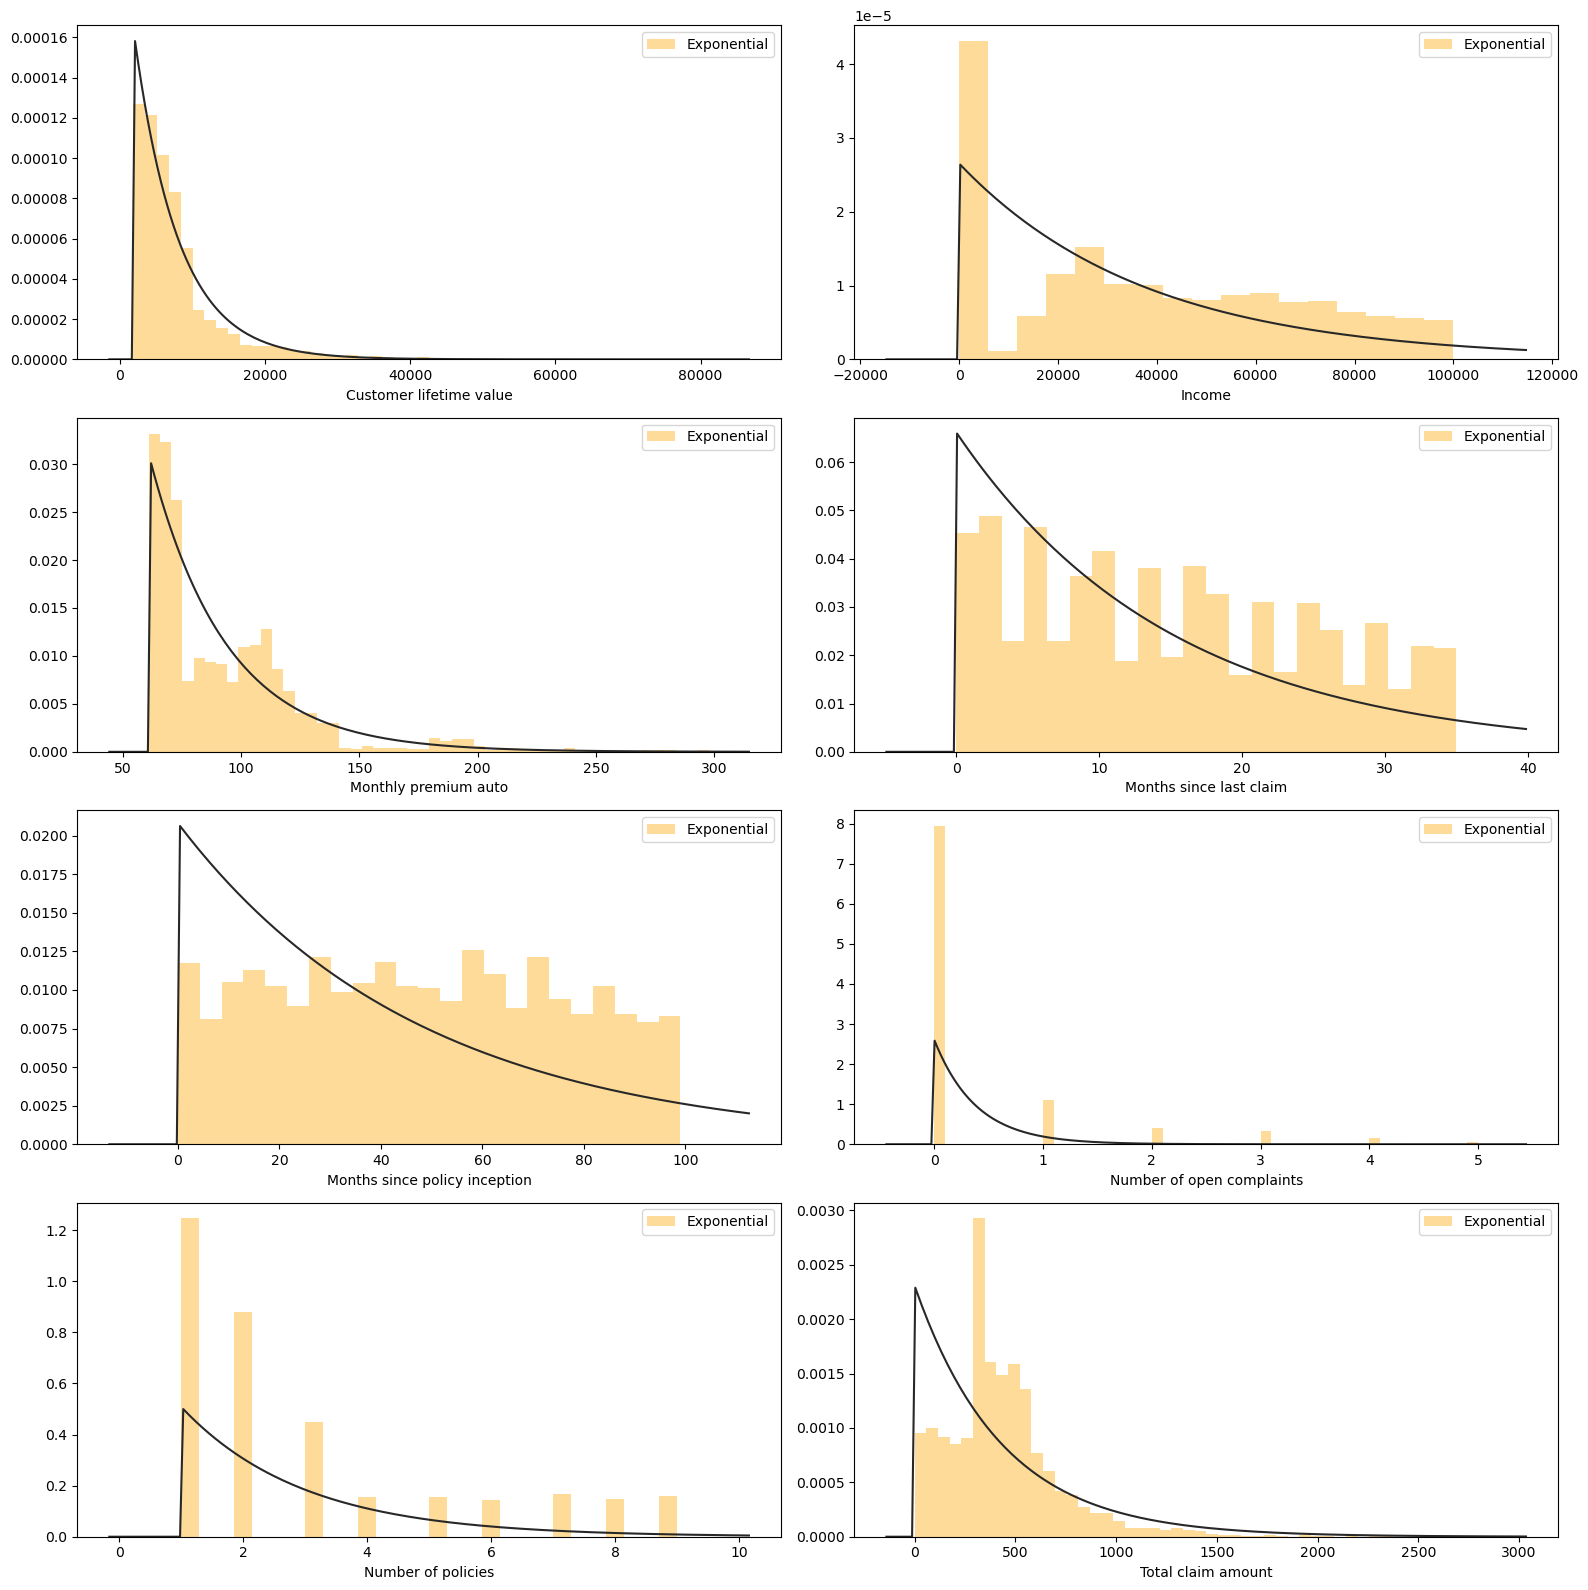

In [93]:
# 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

from scipy.stats import norm, expon

columns = numerical.columns

def check_gauss(data, columns):
    '''
    Check if variables fit the theoretical normal using distribution plots.
    
    Parameters:
    - data: DataFrame, the input dataset
    - columns: list, the columns for which distribution plots are to be created
    '''

    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed

    # Distribution plots
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, 4 * num_rows))

    for i, column in enumerate(columns):
        # Plot the distribution using Seaborn
        sns.distplot(data[column], fit=norm, kde=False, ax=axes[i // 2, i % 2], label='Normal')
        
        axes[i // 2, i % 2].set_xlabel(column.capitalize().replace('_', ' '))
        axes[i // 2, i % 2].legend()

    plt.tight_layout()
    plt.show()

   
def check_expo(data, columns):
    '''
    Check if variables fit the exponential distribution using distribution plots.
    
    Parameters:
    - data: DataFrame, the input dataset
    - columns: list, the columns for which distribution plots are to be created
    '''

    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed

    # Distribution plots
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, 4 * num_rows))

    for i, column in enumerate(columns):
        # Plot the distribution using Seaborn with exponential fit
        sns.distplot(data[column], fit=expon, kde=False, ax=axes[i // 2, i % 2], label='Exponential', color = 'orange')

        axes[i // 2, i % 2].set_xlabel(column.capitalize().replace('_', ' '))
        axes[i // 2, i % 2].legend()

    plt.tight_layout()
    plt.show()

print( '1. None of the variables seem to fit a theoretical normal distribution')

check_gauss(numerical, columns)

print('2. The variables "Customer lifetime value"-"Monthly premium auto"-"Number of open complaints" seem to follow a exponential distribution')


check_expo(numerical, columns)




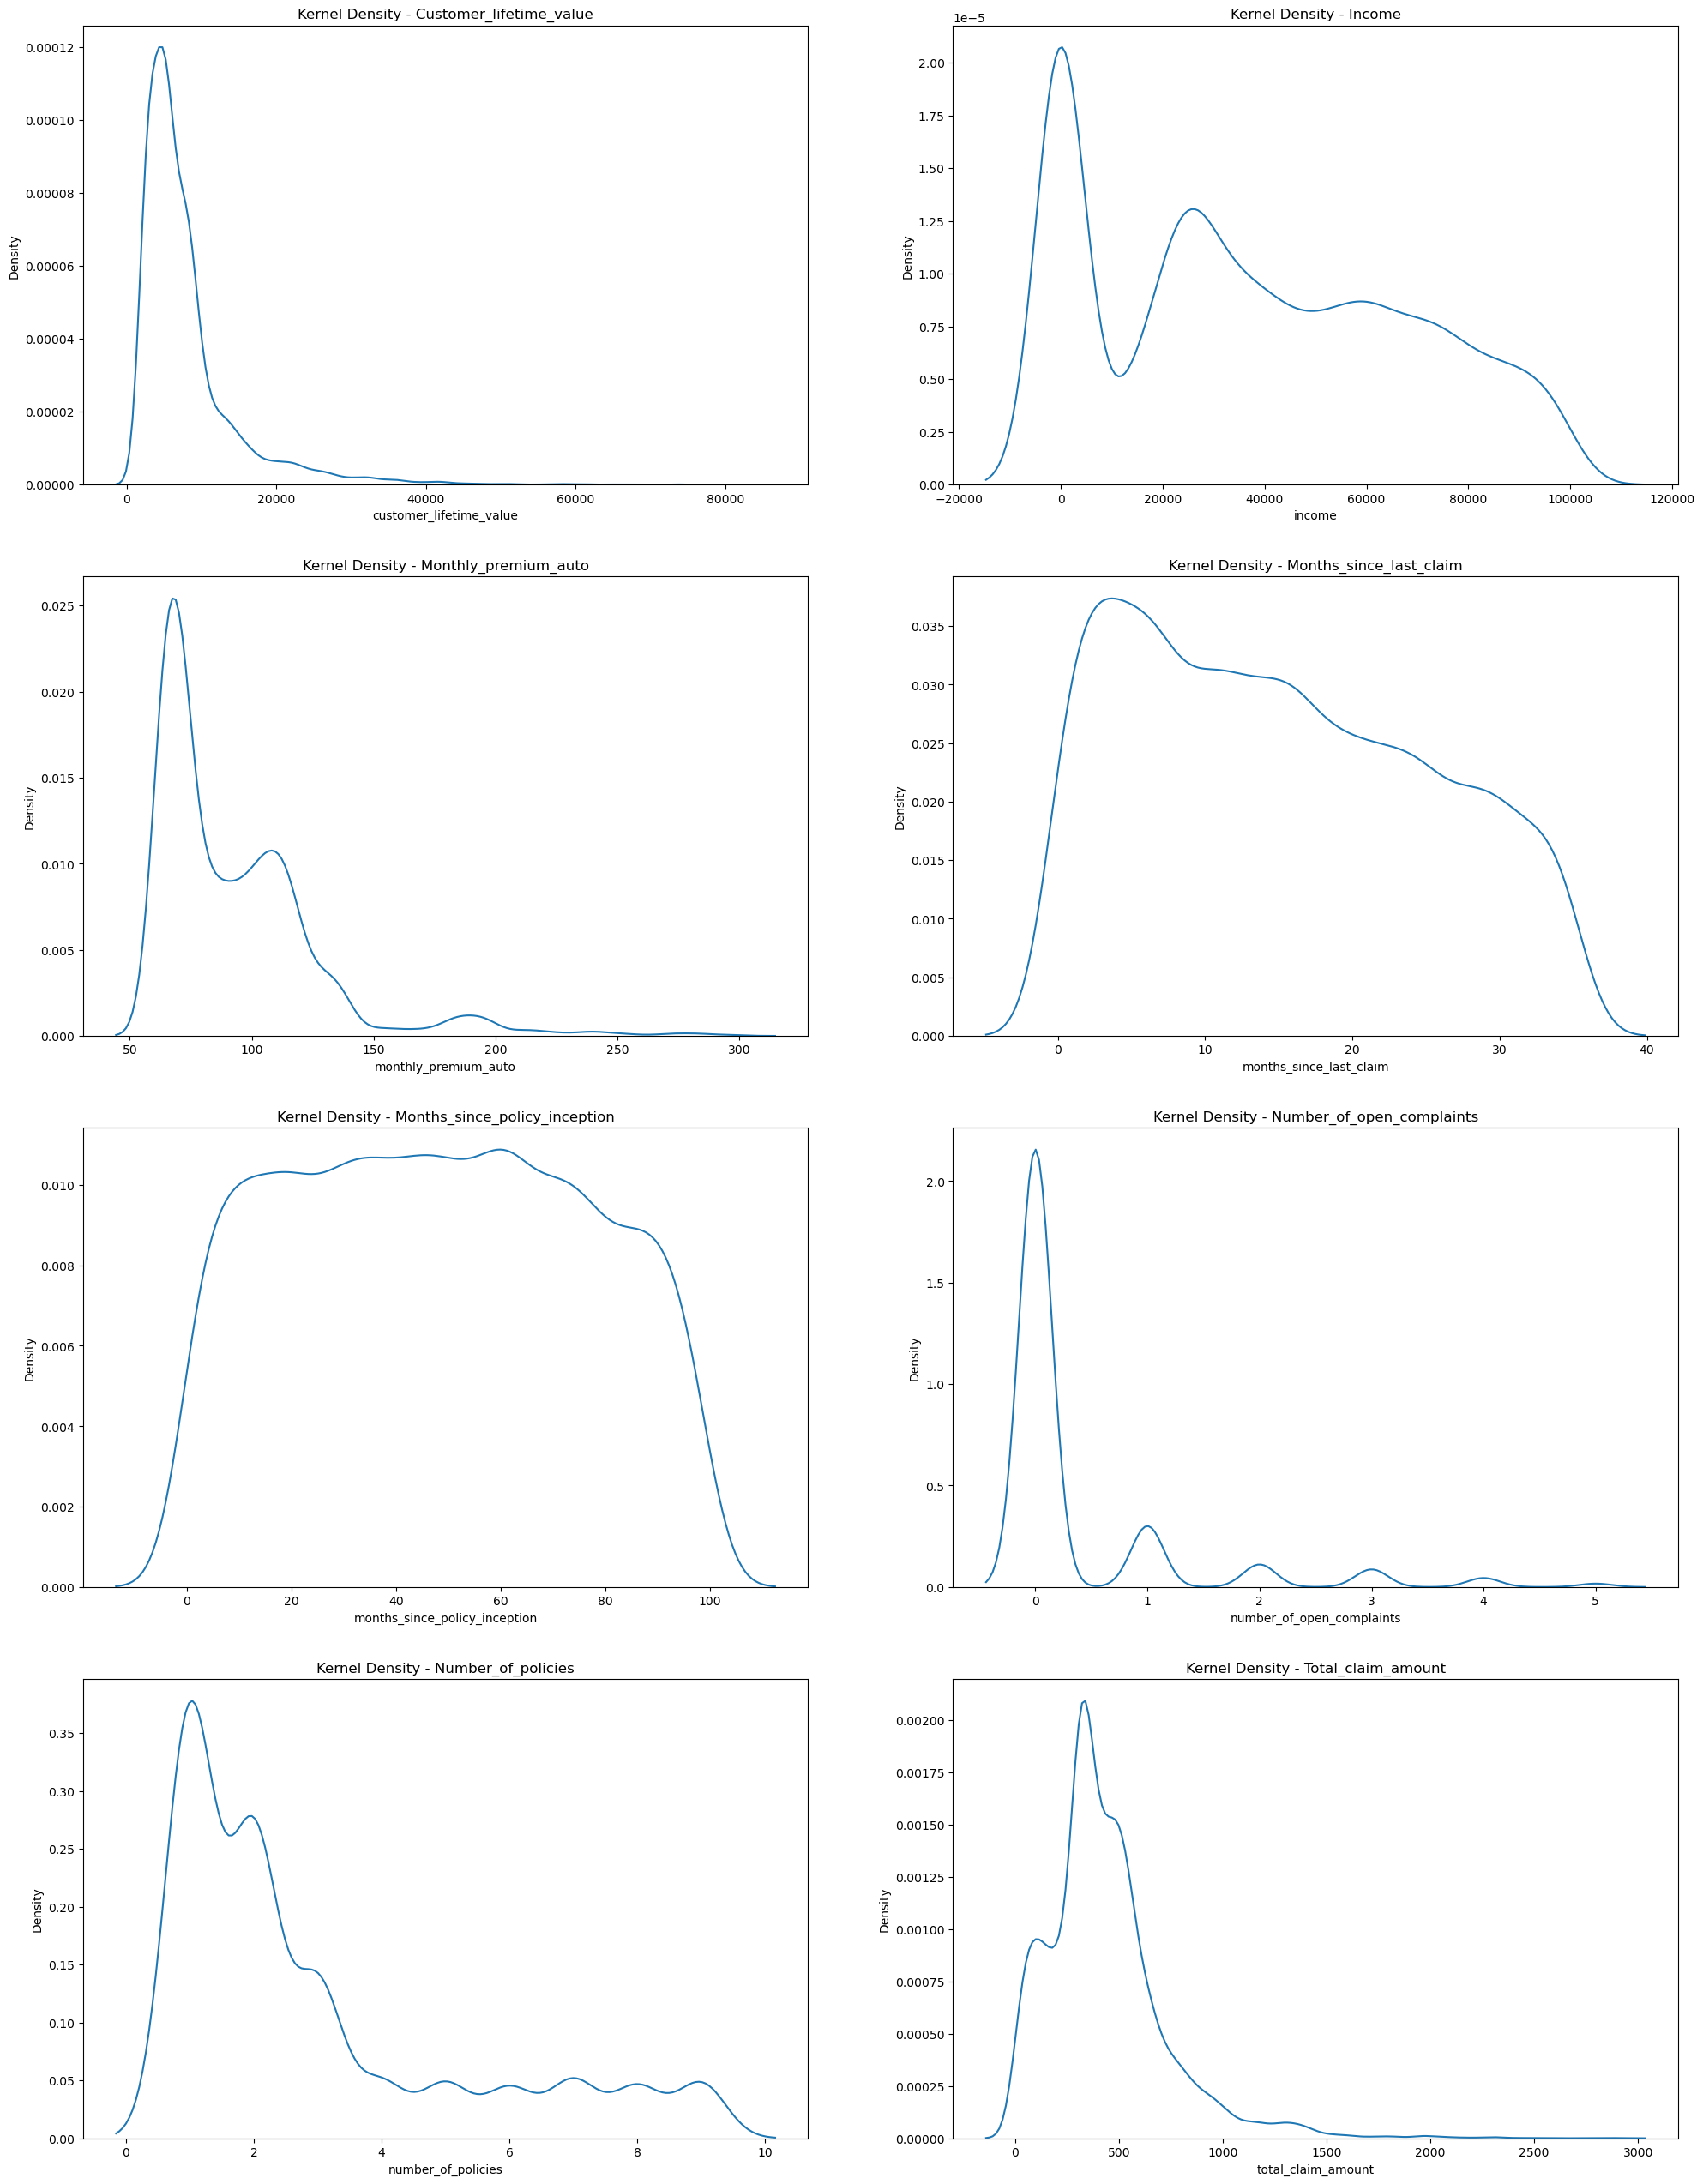

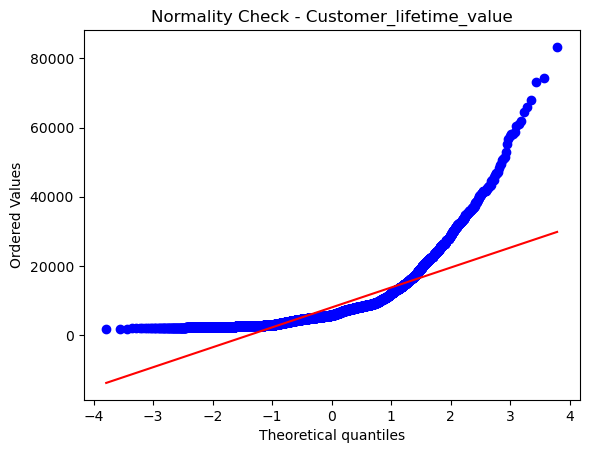

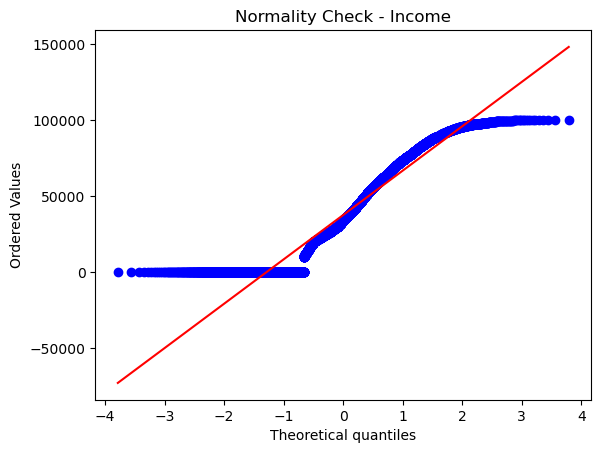

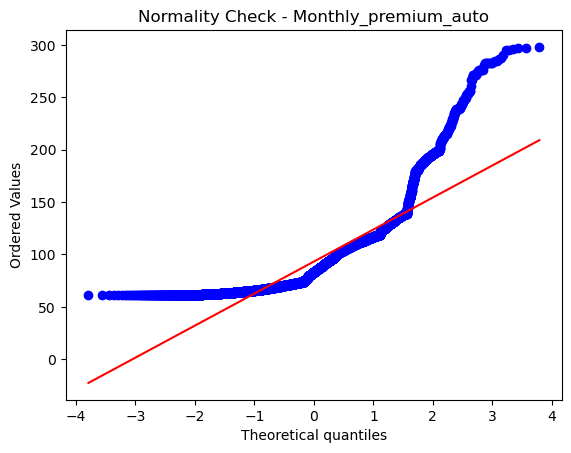

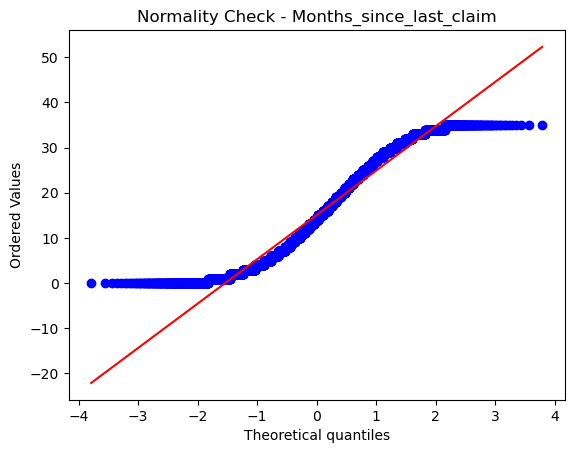

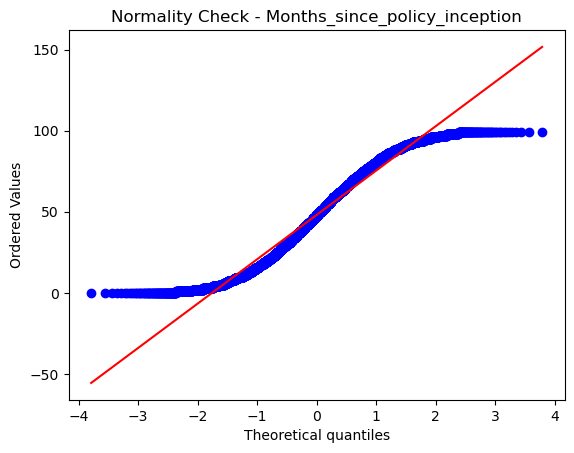

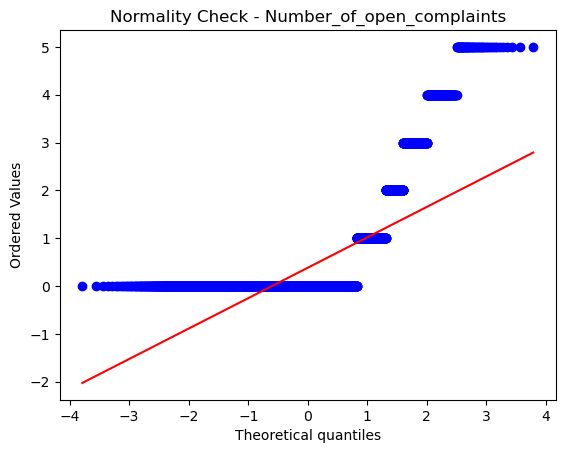

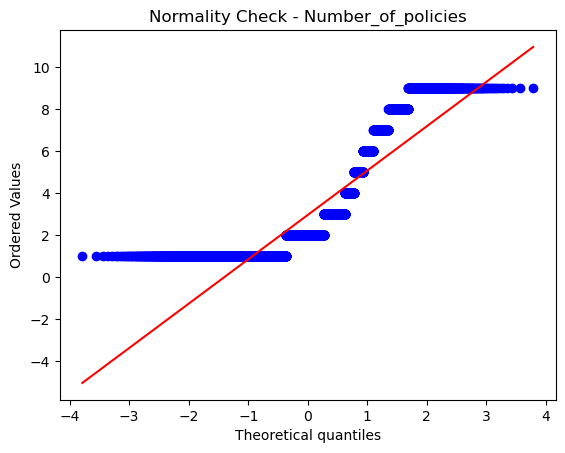

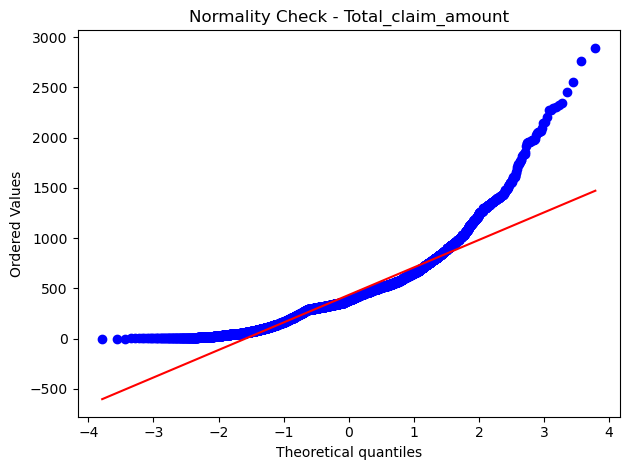

In [94]:
#3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

# Plot Kernel Density and Probability Plot before transforming data

from scipy.stats import probplot

def normality(data, features):
    '''
    Check normality of features using kernel density plot and probability plot.
    
    Parameters:
    - data: DataFrame, the input dataset
    - features: list, the list of features for which normality is to be checked
    '''

    num_features = len(features)
    num_rows = (num_features + 1) // 2  # Calculate the number of rows needed

    # Create a grid of subplots with 2 columns
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(24, 8 * num_rows))

    for i, feature in enumerate(features, start=1):
        row_index = (i - 1) // 2
        col_index = (i - 1) % 2

        # Kernel Density Plot
        sns.kdeplot(data[feature], ax=axes[row_index, col_index])

        # Probability Plot
        plt.figure()  # Create a new figure
        probplot(data[feature], plot=pylab, dist='norm')  # Use the current figure
        plt.title(f'Normality Check - {feature.capitalize()}')

        axes[row_index, col_index].set_title(f'Kernel Density - {feature.capitalize()}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

normality(numerical, columns)



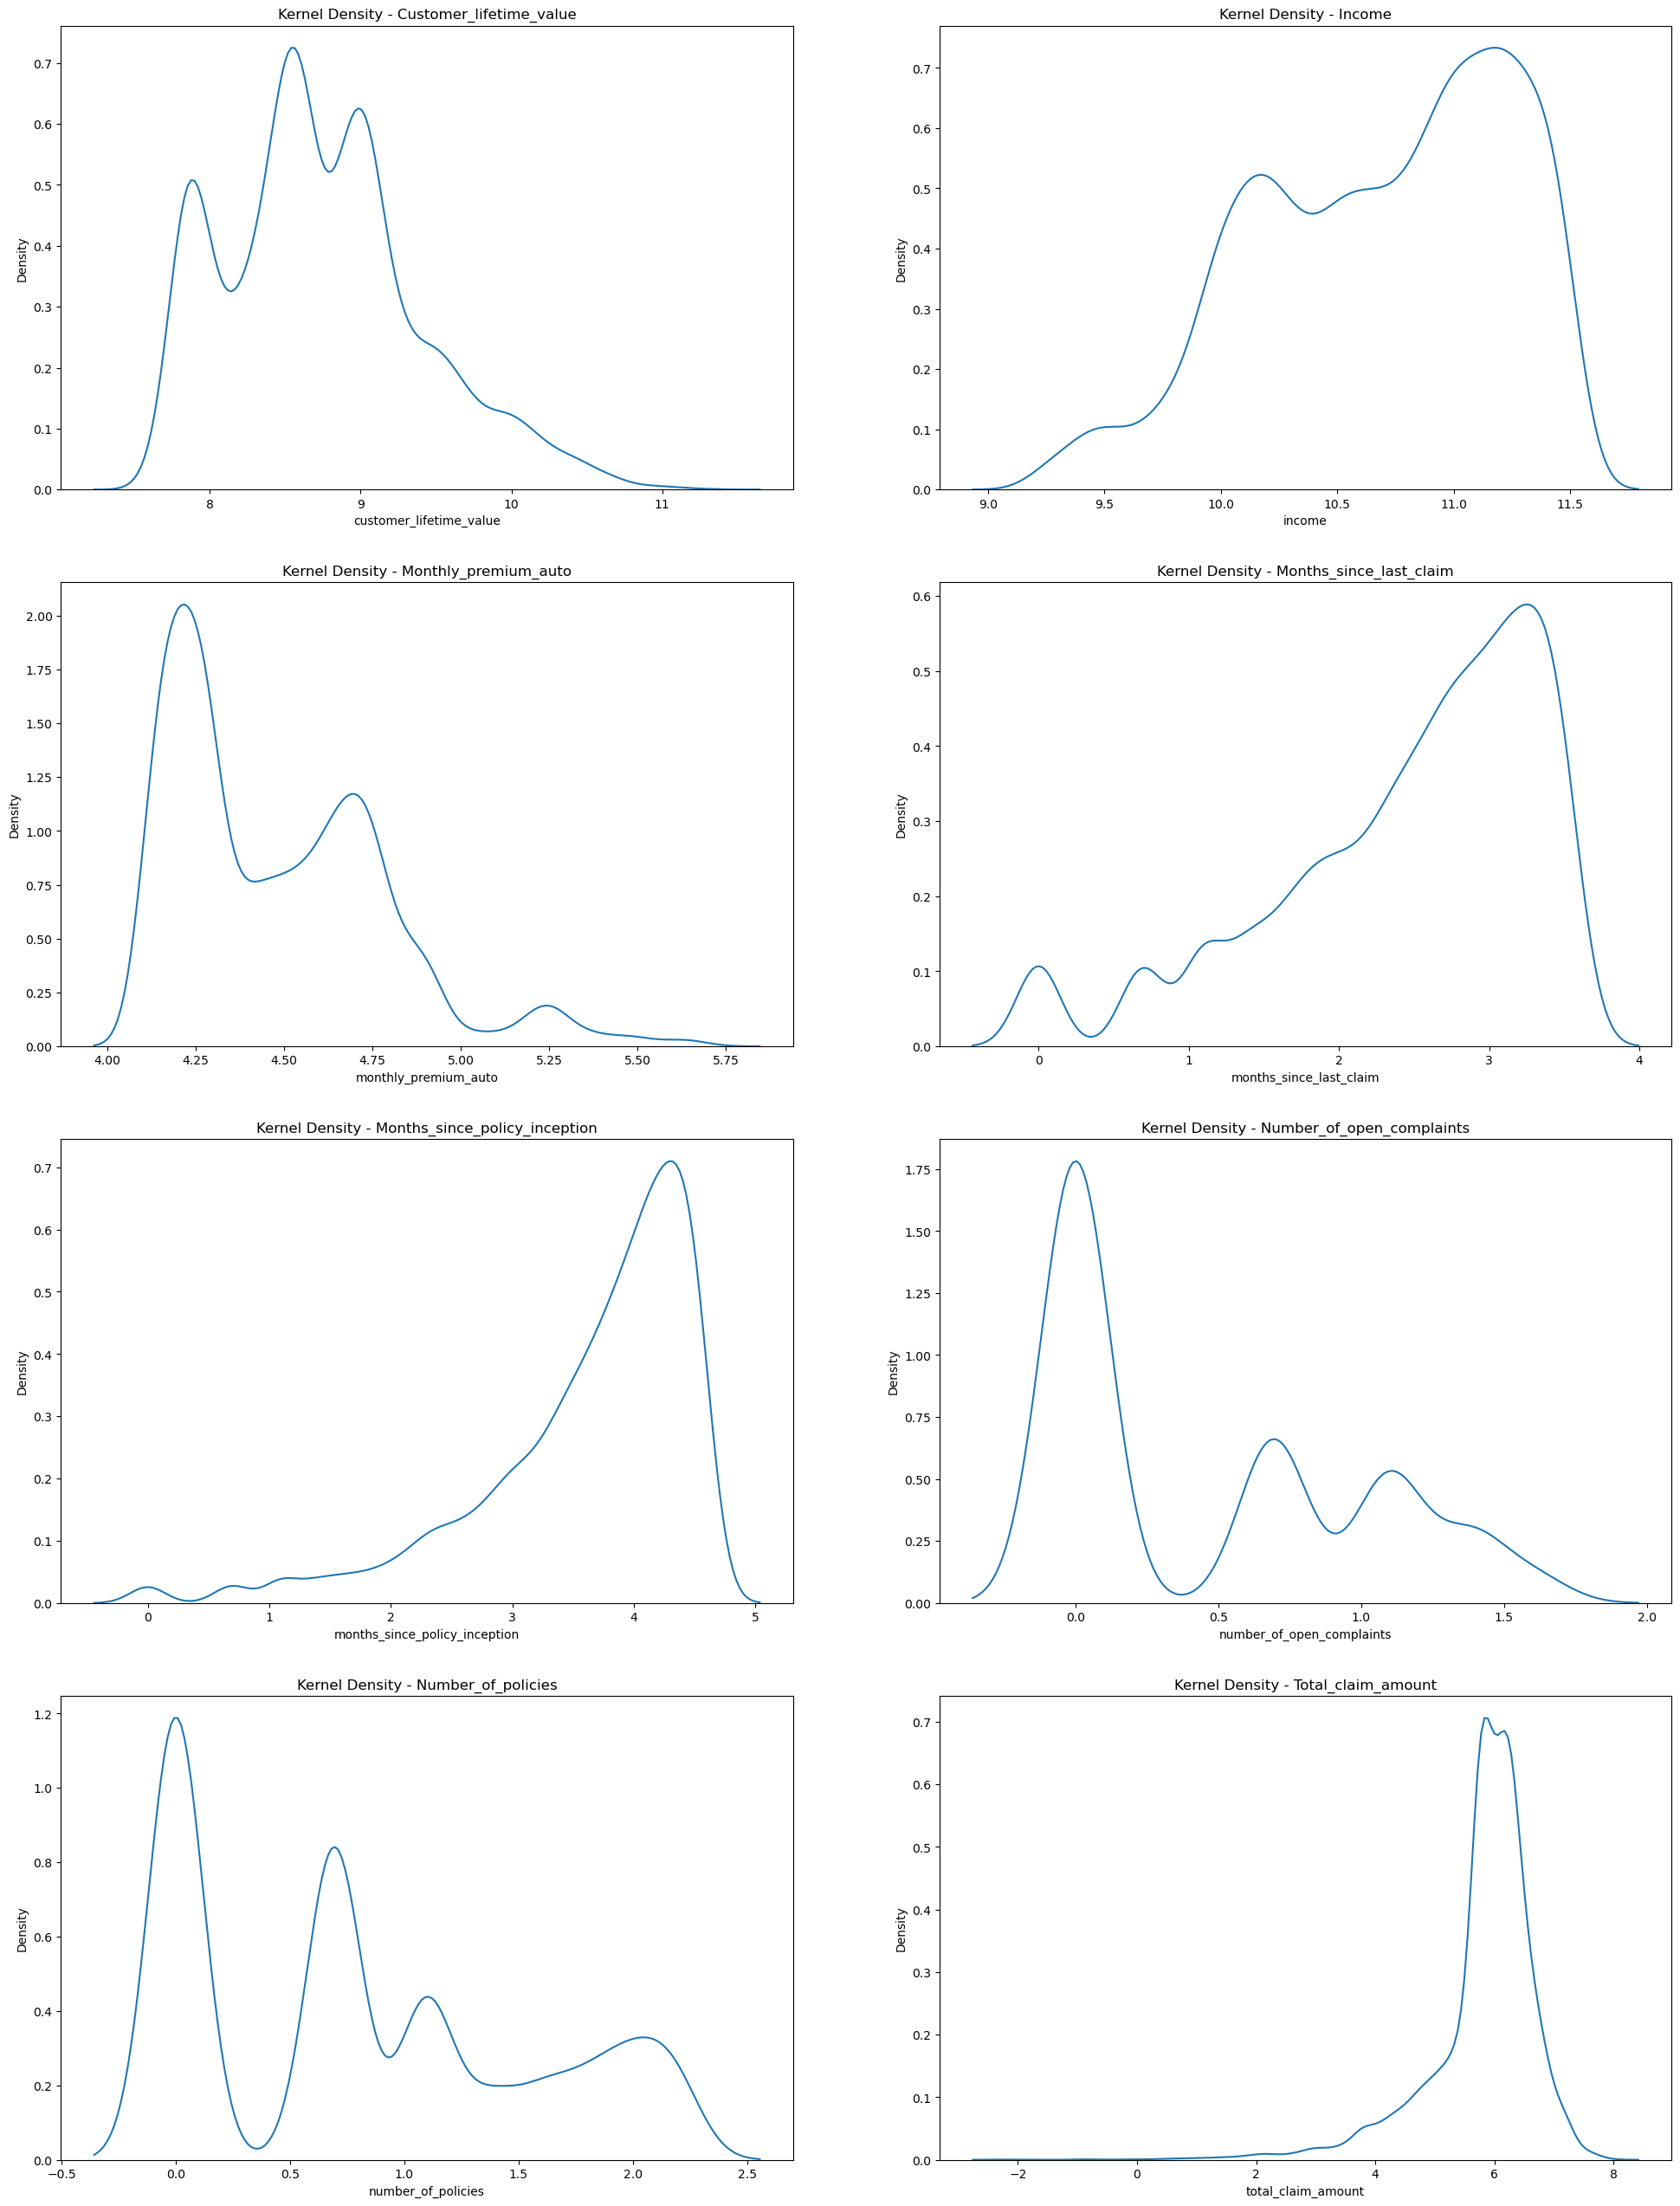

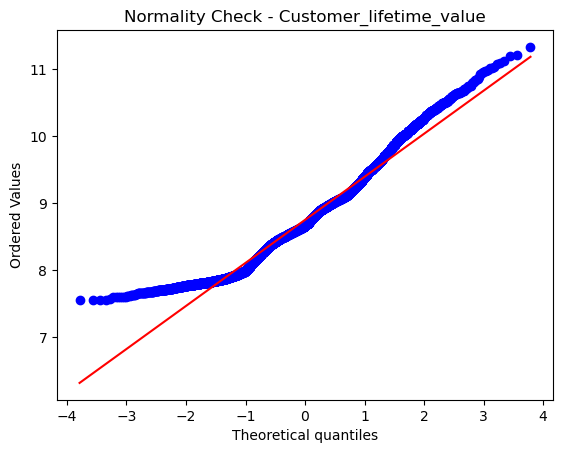

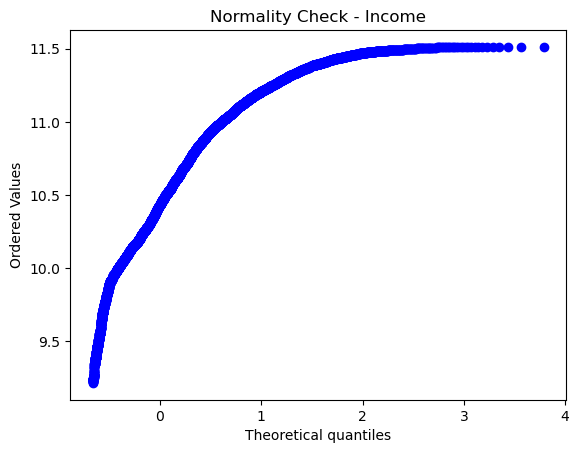

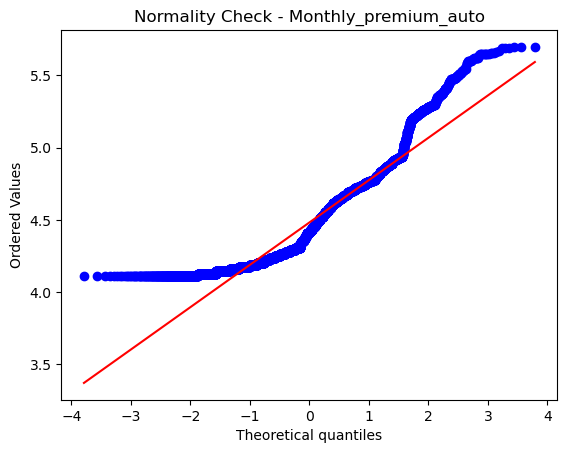

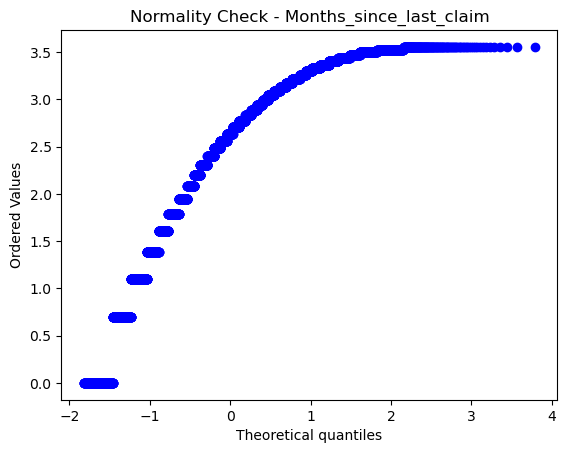

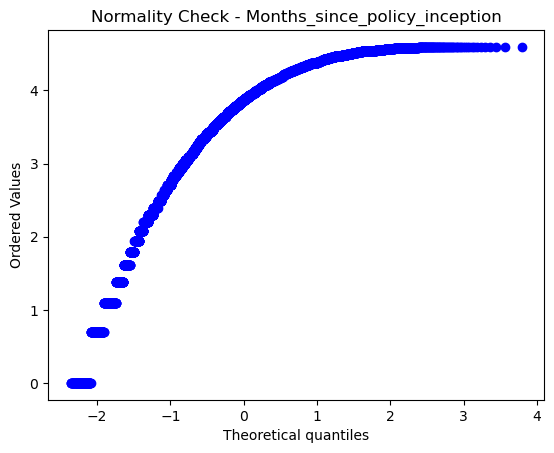

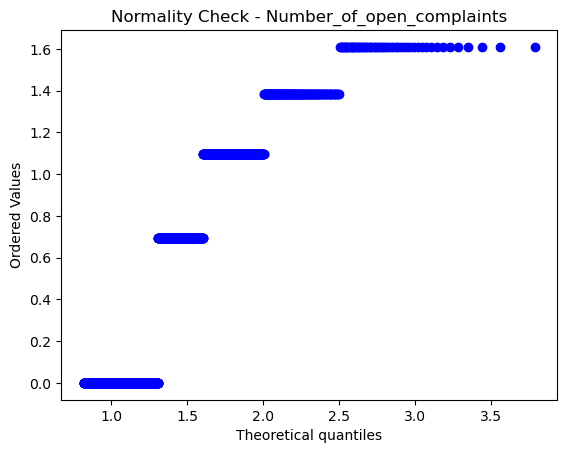

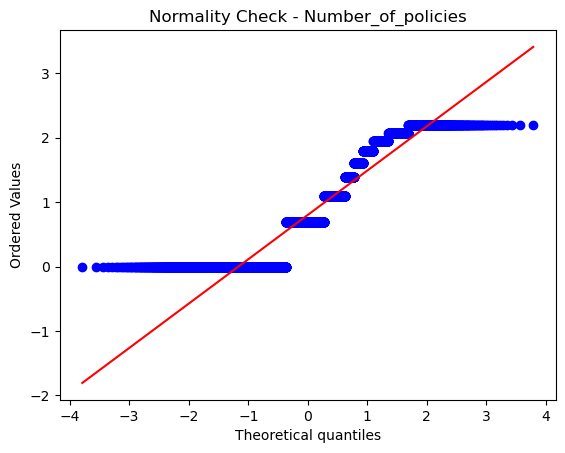

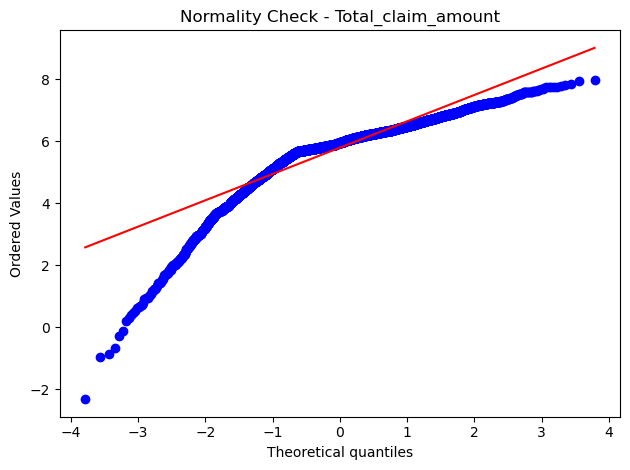

In [95]:
# 3.1 Logarithmic transformation

log_transformed_values = np.log(numerical)

normality(log_transformed_values, log_transformed_values.columns )



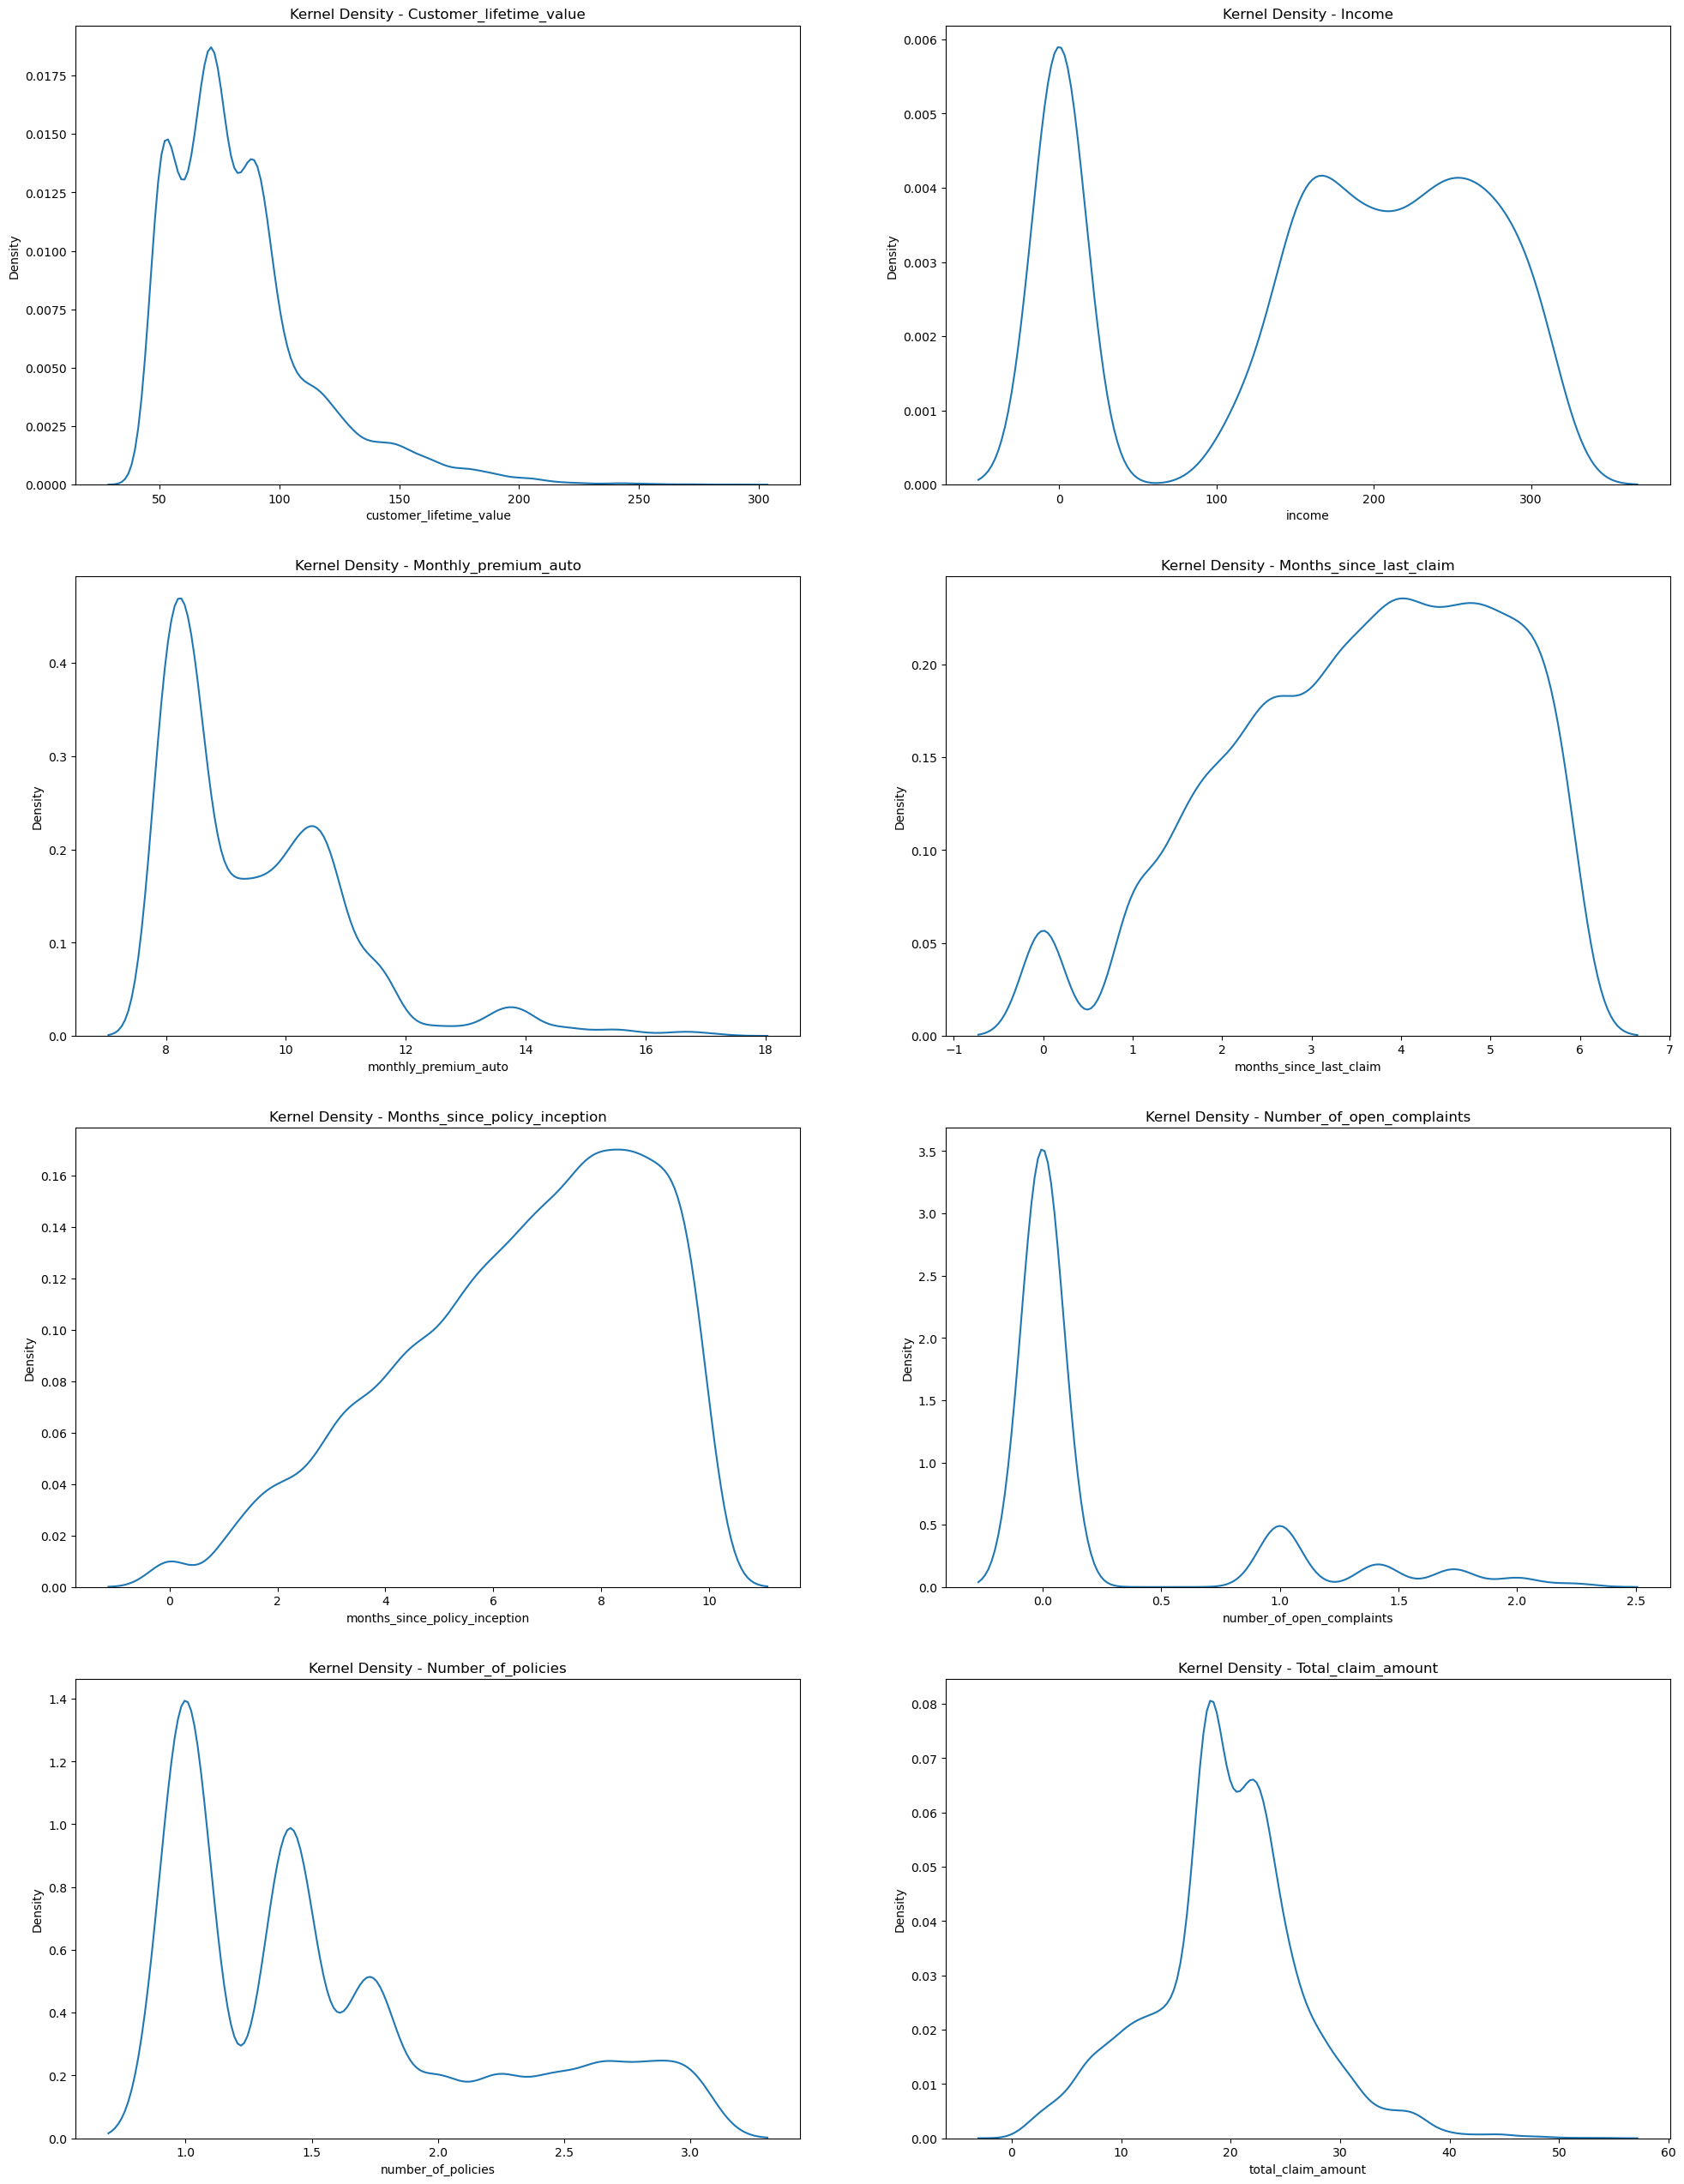

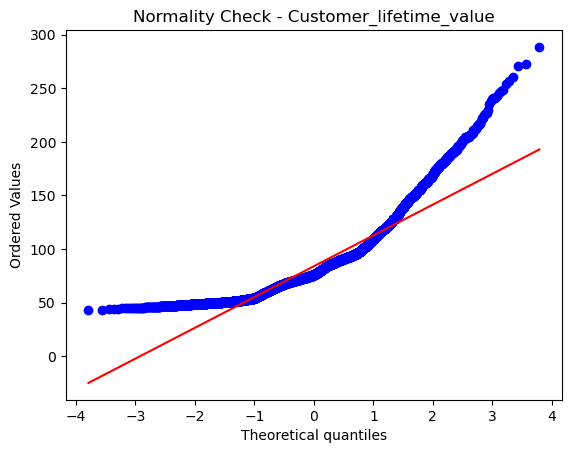

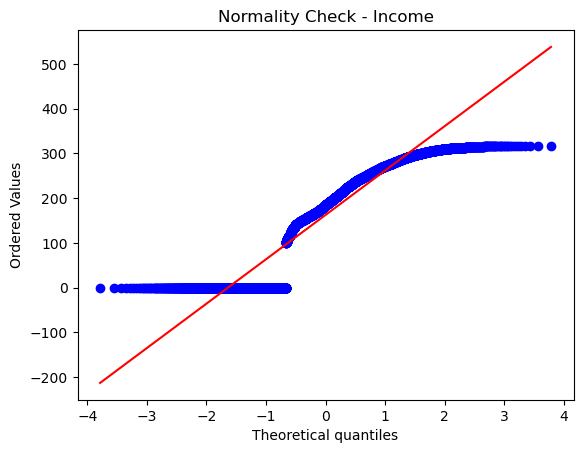

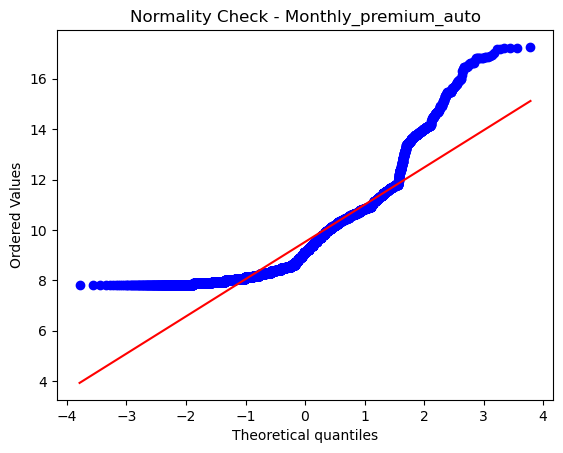

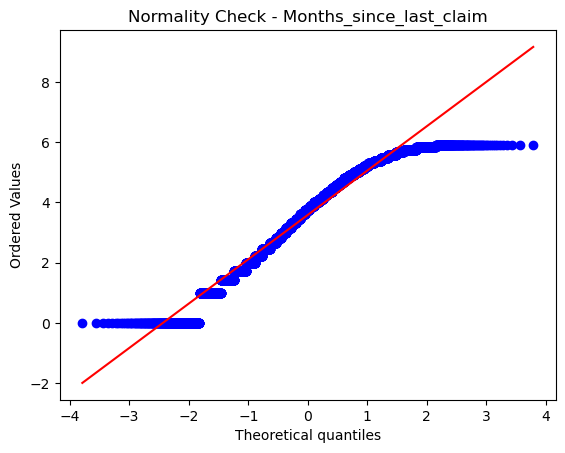

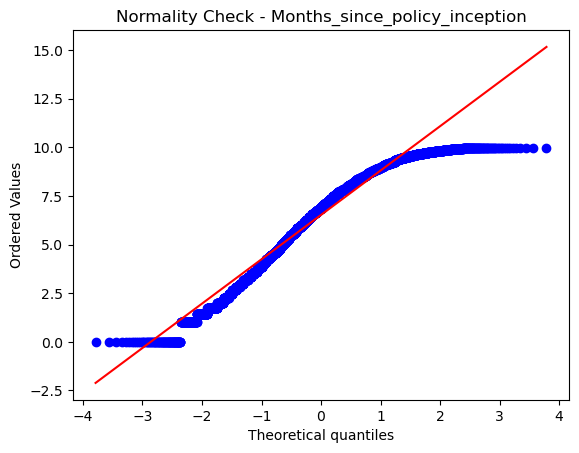

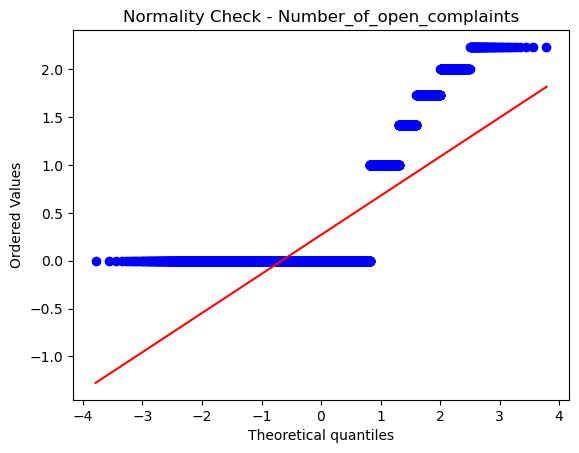

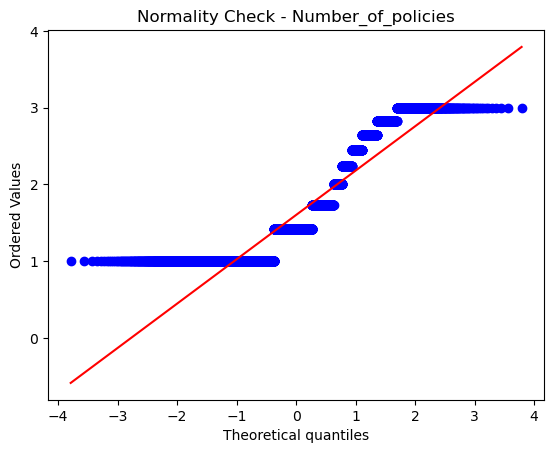

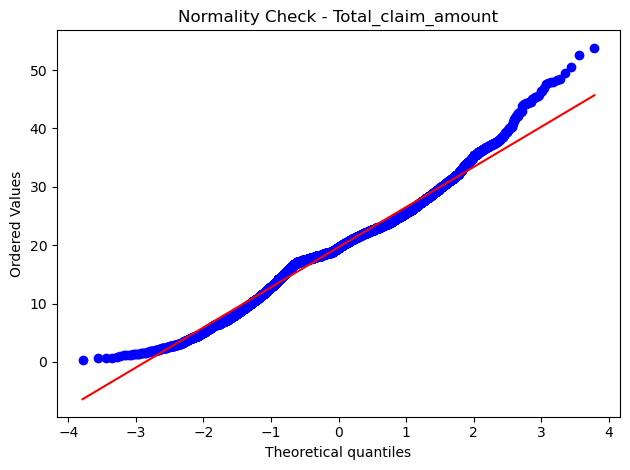

In [96]:
# 3.2 Square Root transformation

sq_transformed_values =np.sqrt(numerical)
normality(sq_transformed_values,sq_transformed_values.columns)



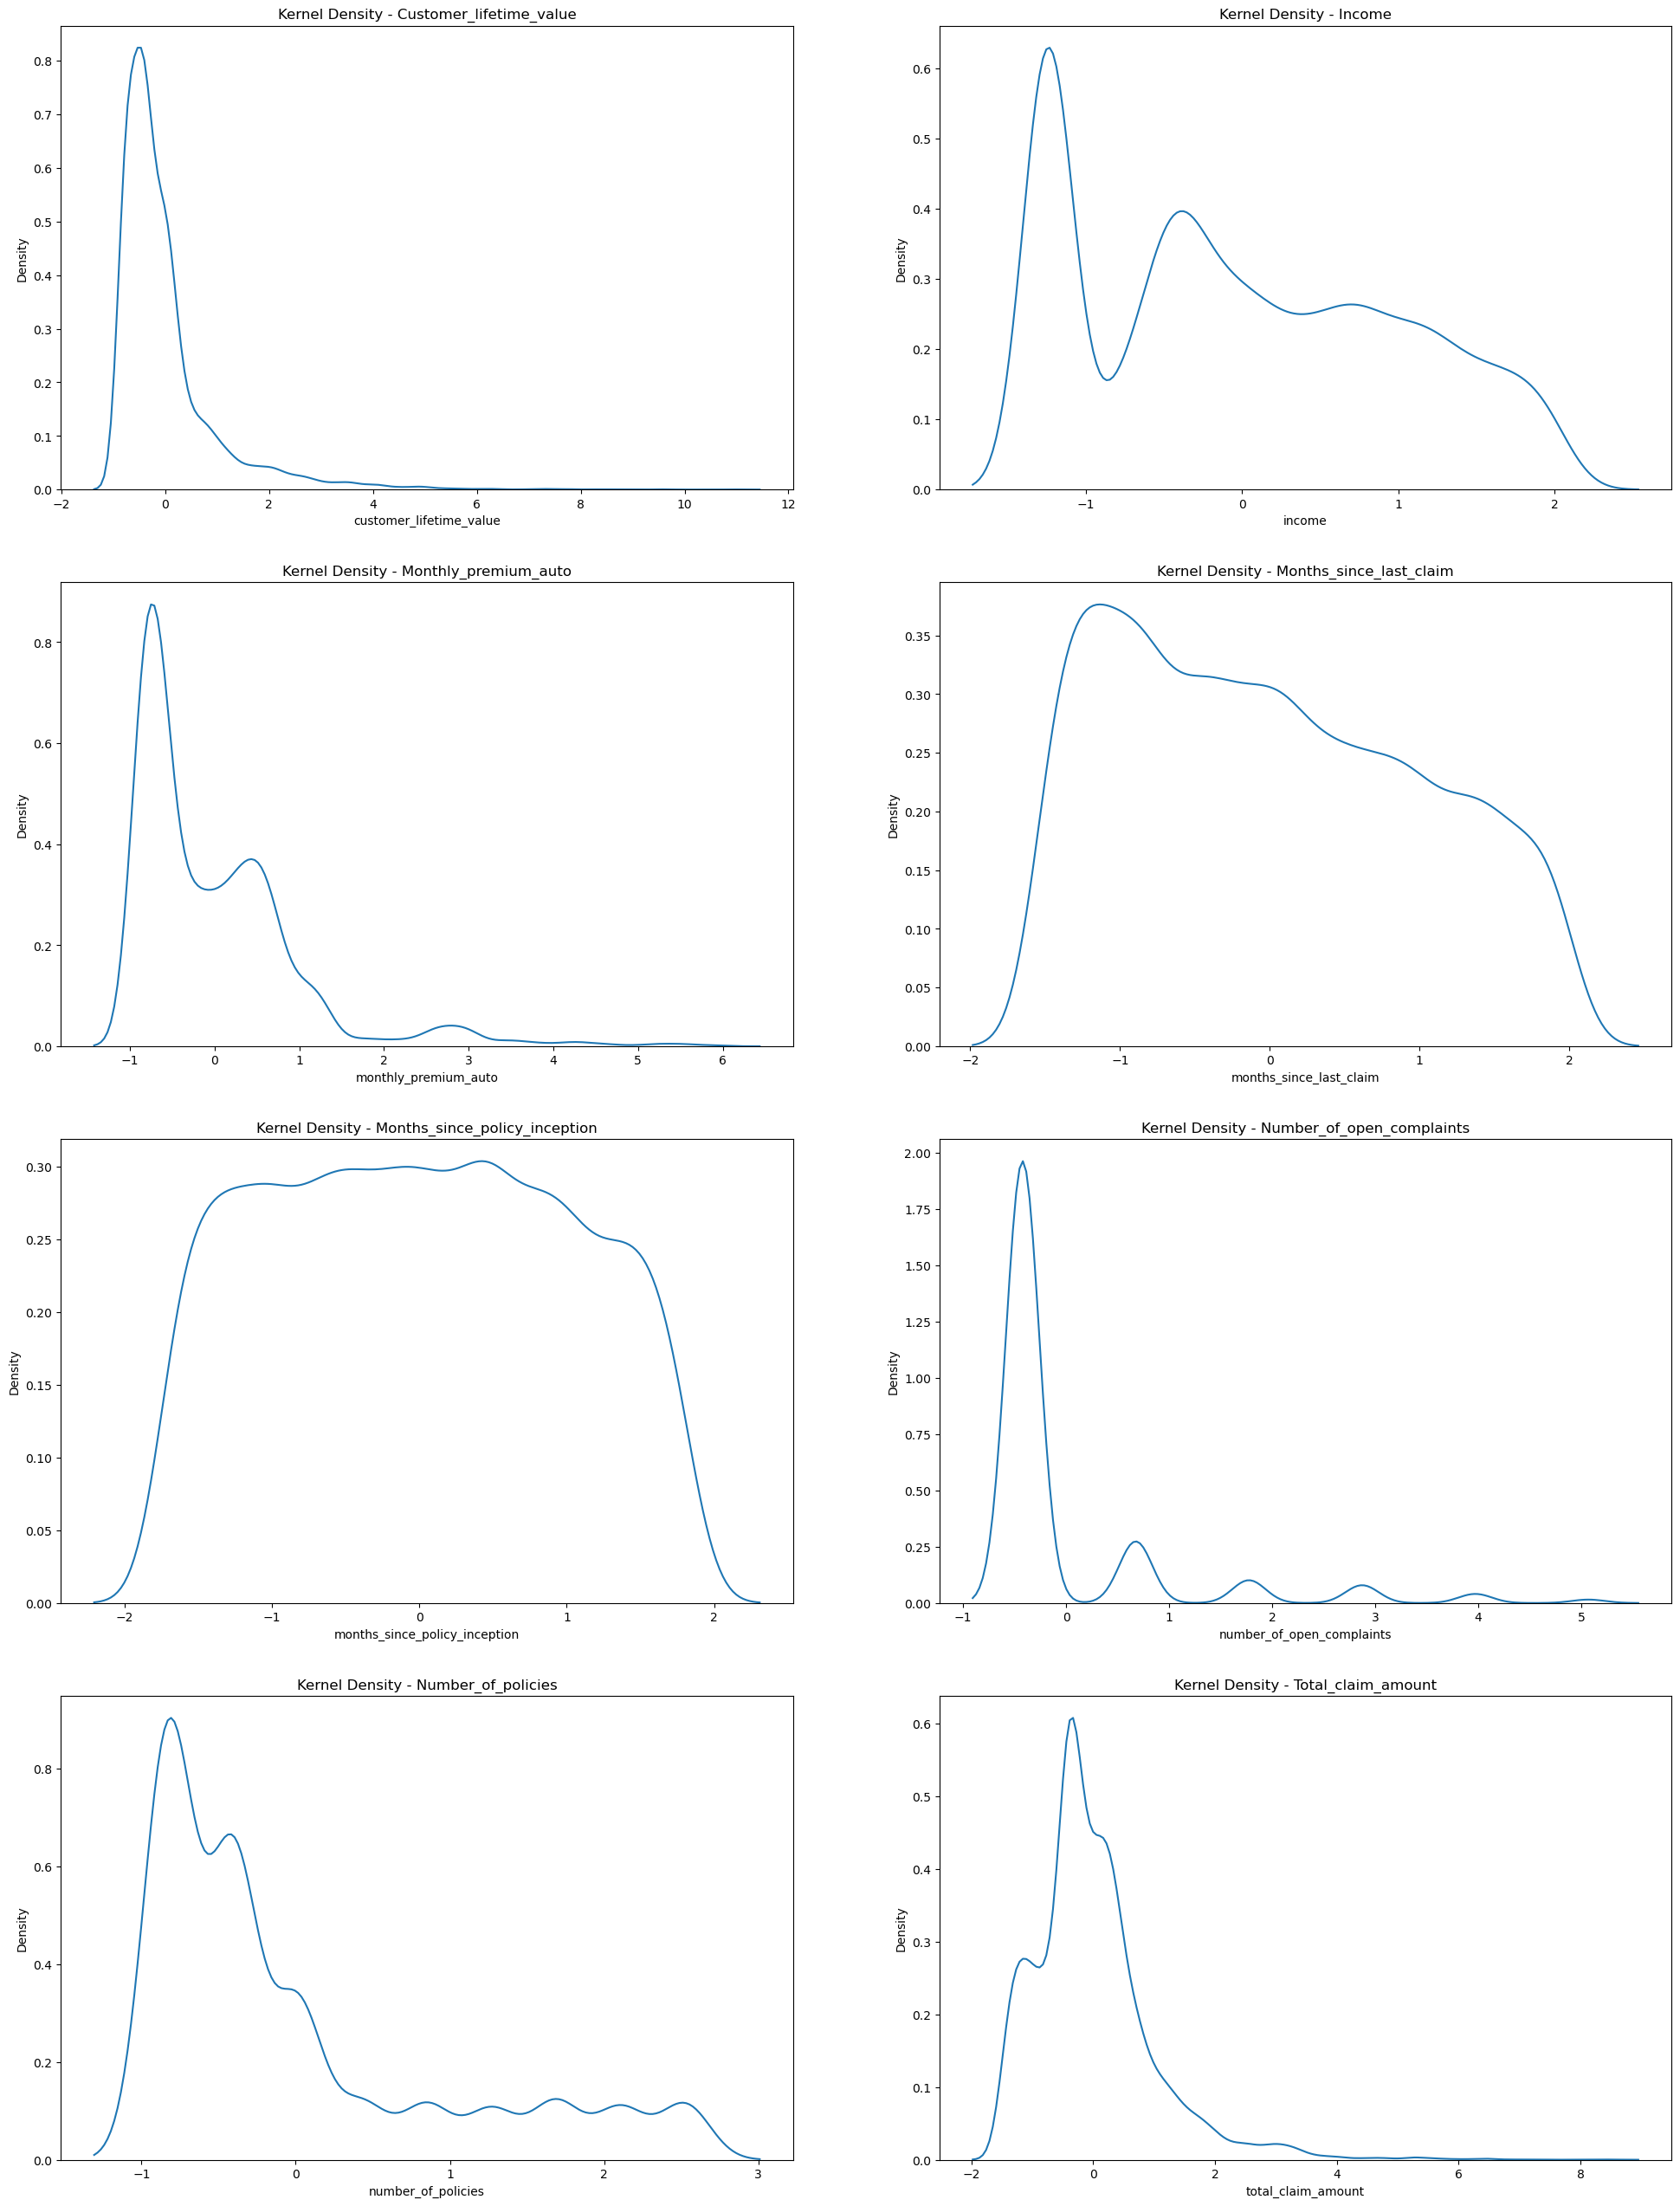

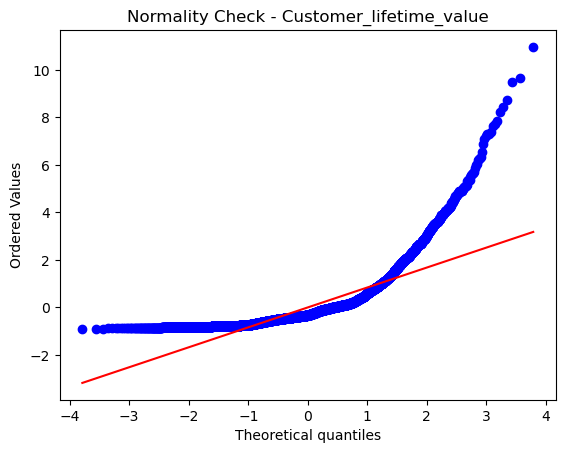

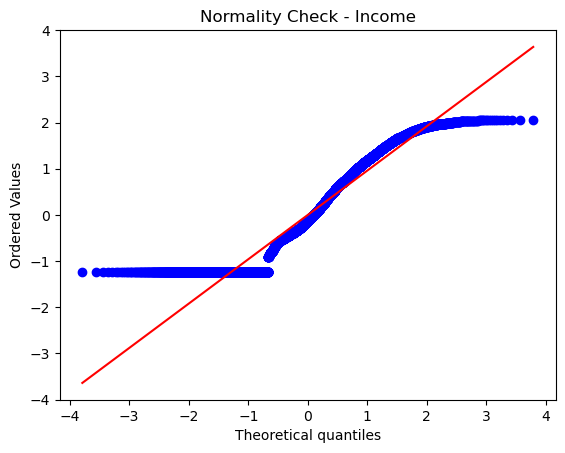

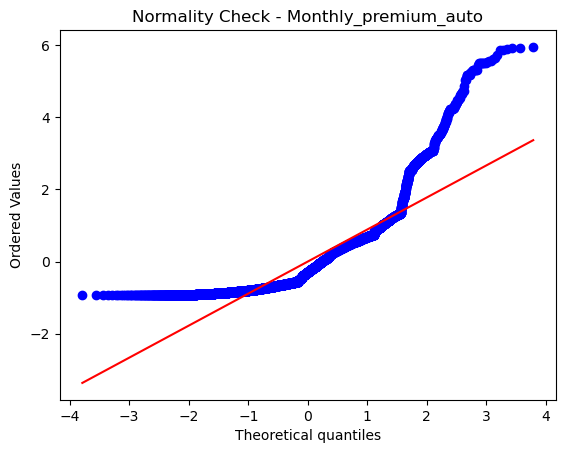

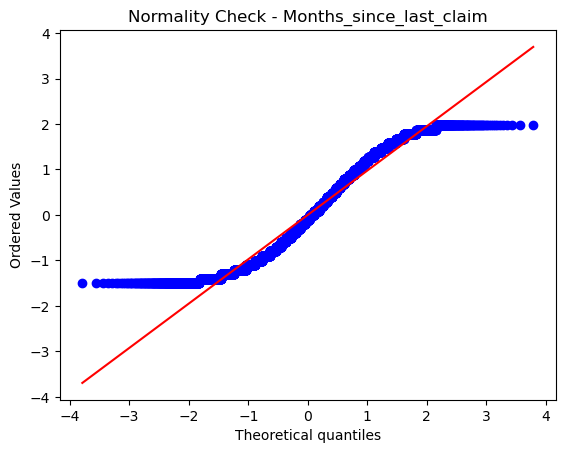

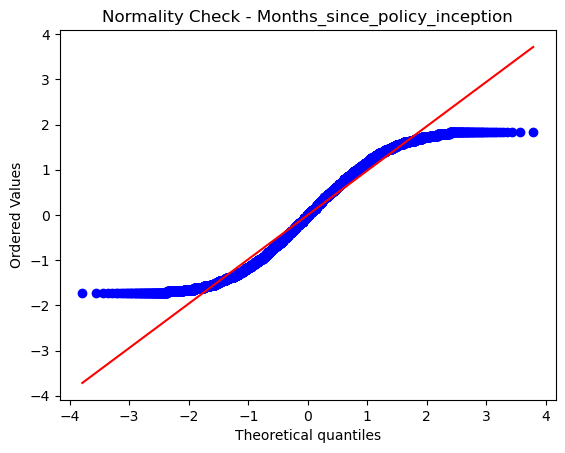

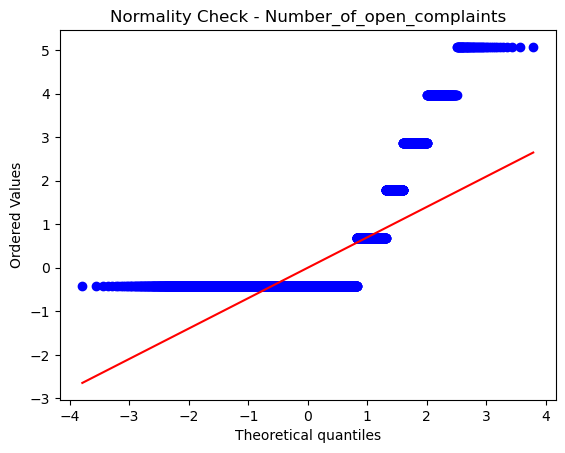

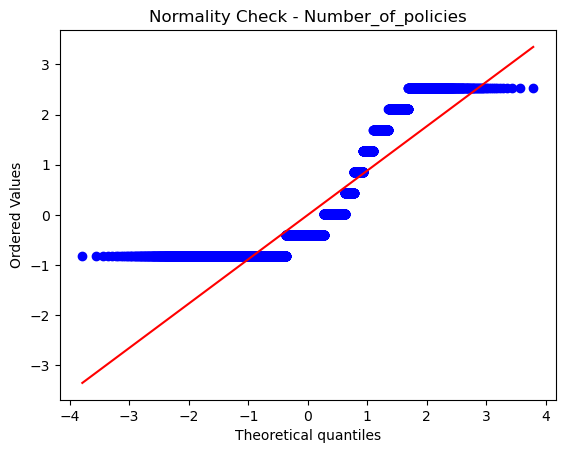

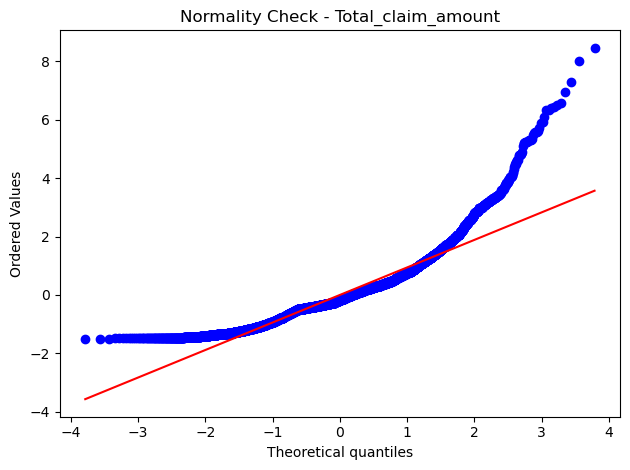

In [97]:
# 3.3 Standardize 

from sklearn.preprocessing import StandardScaler

numerical_features = numerical.columns

# Standardize the features
scaler = StandardScaler()
standardized_values = scaler.fit_transform(numerical)

# Convert standardized values back to a DataFrame
standardized_df = pd.DataFrame(standardized_values, columns=numerical_features)

# Check normality of the standardized features
normality(standardized_df, standardized_df.columns)



In [ ]:
# 3.4 Normalize
from sklearn.preprocessing import MinMaxScaler

# Assuming numerical is your DataFrame with numerical columns
# Extract numerical features
numerical_features = numerical.columns

# Normalize the features
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(numerical)

# Convert normalized values back to a DataFrame
normalized_df = pd.DataFrame(normalized_values, columns=numerical_features)

# Check normality of the normalized features
normality(normalized_df, normalized_df.columns)


## Results

"The best result is obtained with the square root transformation of the column 'Total Claim Amount.' Indeed, the feature appears to follow a normal Gaussian distribution.

Another notable transformation result is achieved with the logarithmic transformation of 'Customer Lifetime Value.' In this case, more data points align along the straight line in the Q-Q plot."


